<a id="setup"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>


<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1.1 |</span><span style='color:#ff6200'> Importing Necessary Libraries</span></b>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'> Loading the Dataset</span></b>


In [2]:
df = pd.read_csv('transaction_data.csv',na_values=(" ","?","_","-1"), encoding="ISO-8859-1")

In [3]:
df.columns

Index(['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country'],
      dtype='object')

In [4]:
column_mappings = {
    'UserId': 'CustomerID',
    'TransactionId': 'InvoiceNo',
    'TransactionTime': 'InvoiceDate',
    'ItemCode': 'StockCode',
    'ItemDescription': 'Description',
    'NumberOfItemsPurchased': 'Quantity',
    'CostPerItem': 'UnitPrice',
    'Country': 'Country'  
    }

df = df.rename(columns=column_mappings)

df = df.sort_values(by='InvoiceDate')

<div style="border-radius:10px; padding: 15px; background-color: #f; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |


<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Initial Data Analysis</p>


In [5]:
df.head(10)

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
432402,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1528779.0,PINK PILLAR CANDLE SILVER FLOCK,3,4.08,United Kingdom
446762,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom
464683,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1528779.0,IVORY PILLAR CANDLE GOLD FLOCK,3,4.08,United Kingdom
400290,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1732164.0,WOOD BLACK BOARD ANT WHITE FINISH,6,8.91,United Kingdom
837706,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom
402947,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom
881206,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1732374.0,WOODEN FRAME ANTIQUE WHITE,18,4.08,United Kingdom
861201,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1732206.0,WOOD S/3 CABINET ANT WHITE FINISH,12,10.98,United Kingdom
778432,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,447573.0,GLASS HEART T-LIGHT HOLDER,72,1.18,United Kingdom
70171,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1083818 entries, 432402 to 717499
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   CustomerID   813658 non-null   float64
 1   InvoiceNo    1083818 non-null  int64  
 2   InvoiceDate  1083818 non-null  object 
 3   StockCode    1078226 non-null  float64
 4   Description  1080816 non-null  object 
 5   Quantity     1083818 non-null  int64  
 6   UnitPrice    1083818 non-null  float64
 7   Country      1083818 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 74.4+ MB


(1083818, 8)

<a id="statistics"></a>
# <b><span style='color:#fcc36d'>Step 2.2 |</span><span style='color:#ff6200'> Summary Statistics</span></b>


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,813658.0,3.210415e+05,35985.584256,259266.00,293013.00,318192.00,352611.0,384027.00
InvoiceNo,1083818.0,6.159417e+06,147634.093880,5900015.00,6026856.00,6166611.00,6289569.0,6397457.00
StockCode,1078226.0,6.616827e+05,451307.849053,42.00,461496.00,475419.00,488964.0,1894494.00
Quantity,1083818.0,2.865675e+01,654.243172,-242985.00,3.00,9.00,30.0,242985.00
UnitPrice,1083818.0,9.498798e+00,2308.138578,-15265.64,1.73,2.88,5.7,1696285.44


In [8]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceDate,1083818,23260,Sat Jan 12 10:41:00 IST 2019,2228
Description,1080816,4222,WHITE HANGING HEART T-LIGHT HOLDER,4738
Country,1083818,38,United Kingdom,990956


<a id="data_cleaning"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 |  Data Cleaning & Transformation</p>


<a id="missing_values"></a>
# <b><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#ff6200'> Handling Missing Values</span></b>


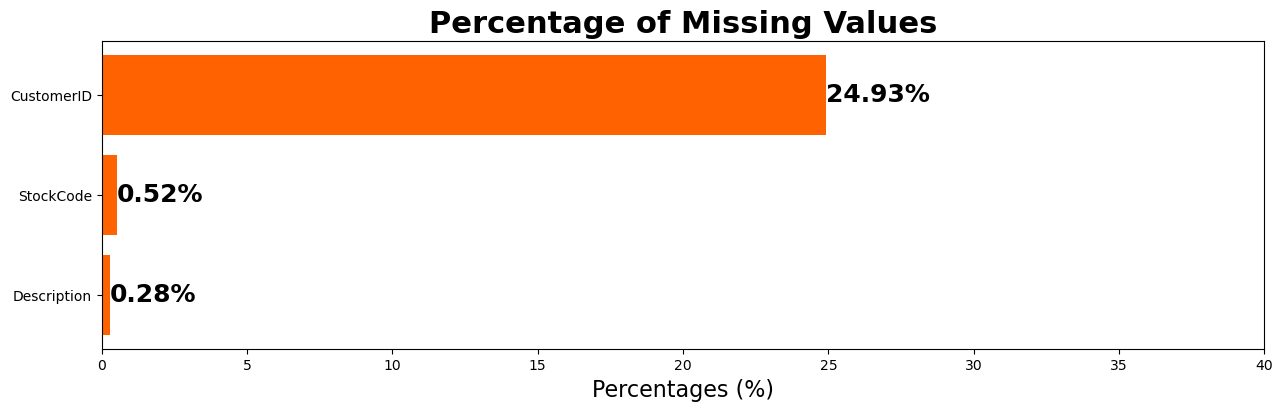

In [9]:

missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

missing_percentage.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')


for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

ax.set_xlim([0, 40])

plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

In [10]:
df[df['CustomerID'].isnull() | df['Description'].isnull()].tail() 

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
319232,NaN,6162475,Wed Sep 26 12:27:00 IST 2018,340977.0,SLEEPING CAT ERASERS,33,0.58,United Kingdom
460008,NaN,6162475,Wed Sep 26 12:27:00 IST 2018,470988.0,ENAMEL FIRE BUCKET CREAM,3,19.50,United Kingdom
817280,NaN,6162475,Wed Sep 26 12:27:00 IST 2018,460509.0,JUMBO BAG PINK VINTAGE PAISLEY,6,5.70,United Kingdom
117269,NaN,6162475,Wed Sep 26 12:27:00 IST 2018,475902.0,LUNCH BAG DOLLY GIRL DESIGN,3,5.70,United Kingdom
238860,NaN,6162475,Wed Sep 26 12:27:00 IST 2018,468006.0,DECORATION WOBBLY RABBIT METAL,3,1.73,United Kingdom


In [11]:
df['Description'].isnull().sum()


3002

In [12]:
df.shape

(1083818, 8)

In [13]:
df = df.dropna(subset=['CustomerID'])
df.shape

(813658, 8)

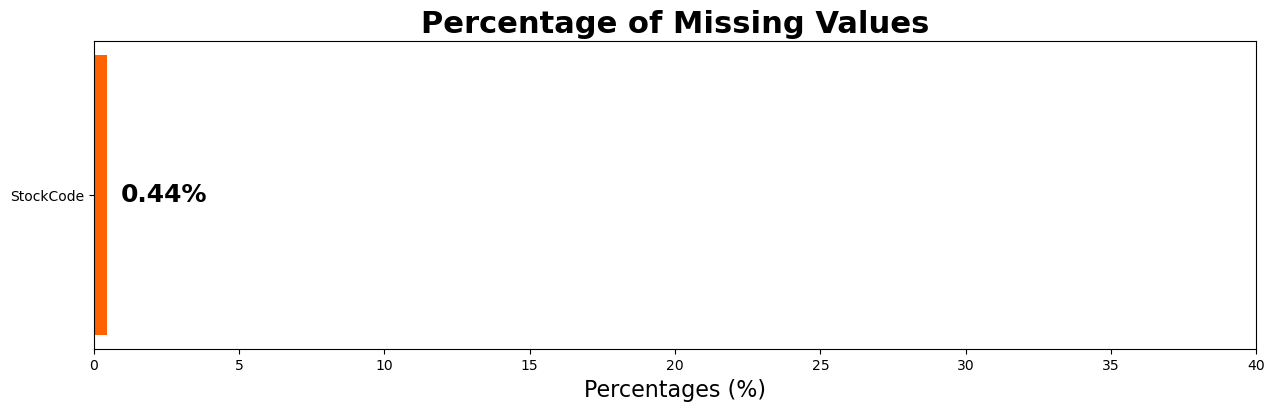

In [14]:

missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100


missing_percentage.sort_values(ascending=True, inplace=True)


fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')


ax.set_xlim([0, 40])

plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

<a id="duplicates"></a>
# <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'> Handling Duplicates</span></b>


In [15]:
duplicate_rows = df[df.duplicated(keep=False)]

duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

duplicate_rows_sorted.head(10)

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country
1024276,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,456330.0,GLASS STAR FROSTED T-LIGHT HOLDER,18,5.87,United Kingdom
920591,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,456330.0,GLASS STAR FROSTED T-LIGHT HOLDER,18,5.87,United Kingdom
55169,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,477792.0,SET 7 BABUSHKA NESTING BOXES,6,10.56,United Kingdom
508218,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,477792.0,SET 7 BABUSHKA NESTING BOXES,6,10.56,United Kingdom
323263,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1492113.0,WHITE METAL LANTERN,18,4.68,United Kingdom
635173,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1492113.0,WHITE METAL LANTERN,18,4.68,United Kingdom
528742,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1764609.0,KNITTED UNION FLAG HOT WATER BOTTLE,18,4.68,United Kingdom
538323,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1764609.0,KNITTED UNION FLAG HOT WATER BOTTLE,18,4.68,United Kingdom
918916,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1764609.0,RED WOOLLY HOTTIE WHITE HEART.,18,4.68,United Kingdom
412255,374850.0,5900015,Mon Feb 12 04:26:00 IST 2018,1764609.0,RED WOOLLY HOTTIE WHITE HEART.,18,4.68,United Kingdom


In [16]:
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

df.drop_duplicates(inplace=True)

The dataset contains 412089 duplicate rows that need to be removed.


In [17]:
df.shape

(401569, 8)

<a id="InvoiceNo_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> Specify the loyal and one purchase customers and most expensive proudct</span></b>


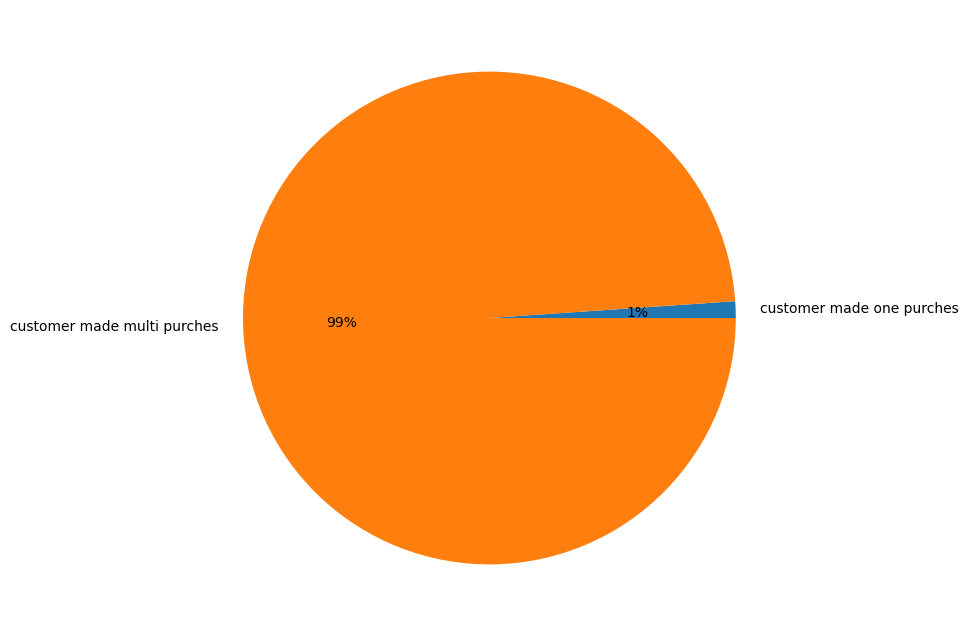

In [18]:
customer_with_one_purche =  df['CustomerID'].nunique()
customer_with_multi_purches= df['CustomerID'].count() - customer_with_one_purche
x=np.array([customer_with_one_purche,customer_with_multi_purches])
plt.figure(figsize=(16,8))
plt.pie(x,labels=["customer made one purches","customer made multi purches"],autopct='%1.0f%%')
plt.show()

In [19]:
most_expensive  = df.groupby('StockCode')['UnitPrice'].sum().reset_index()
most_expensive= most_expensive.sort_values(by='UnitPrice', ascending=False)
top10=most_expensive[1:11]
top10

,StockCode,UnitPrice
1261,470883.0,32495.64
2516,998886.0,11625.60
1480,475755.0,9564.09
0,42.0,9270.84
1665,479787.0,8481.34
1543,477120.0,8373.82
2973,1787079.0,8345.16
2957,1786386.0,8273.83
2983,1787583.0,8254.14
1450,475104.0,7449.42


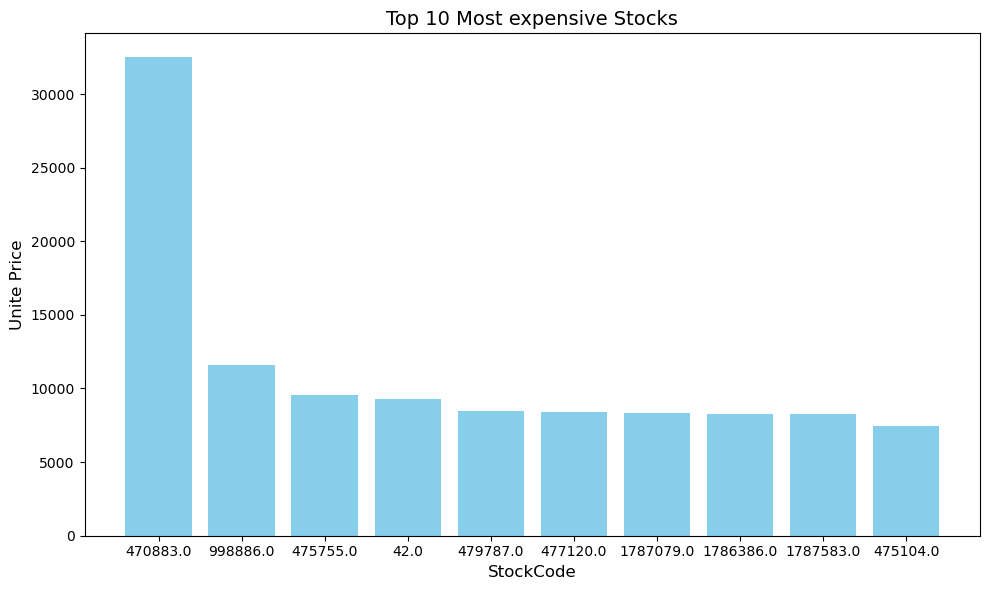

In [20]:
top10['StockCode'] = top10['StockCode'].astype(str)

plt.figure(figsize=(10,6))
plt.bar(top10['StockCode'], top10['UnitPrice'], color='skyblue')
plt.title('Top 10 Most expensive Stocks', fontsize=14)
plt.xlabel('StockCode', fontsize=12)
plt.ylabel('Unite Price', fontsize=12)
plt.tight_layout()
plt.show()

In [21]:
customer_with_one_purche =  df.drop_duplicates(subset='CustomerID')
stock_purchase_count = customer_with_one_purche.groupby('StockCode')['Quantity'].sum().reset_index()
most_purchased_stocks = stock_purchase_count.sort_values(by='Quantity', ascending=False)
top10=most_purchased_stocks.head(10)
top10

,StockCode,Quantity
1114,486486.0,222930
1497,1781346.0,37440
512,466137.0,14367
14,336294.0,12000
34,378147.0,7200
5,315756.0,6360
1397,1302378.0,5400
32,359016.0,5184
380,460215.0,5082
1504,1782459.0,4695


In [22]:
customer_with_multi_purches =  df[df.duplicated('CustomerID')]
stock_purchase_count = customer_with_multi_purches.groupby('StockCode')['Quantity'].sum().reset_index()
most_purchased_stocks = stock_purchase_count.sort_values(by='Quantity', ascending=False)
top10_2=most_purchased_stocks.head(10)
top10_2

,StockCode,Quantity
2972,1787079.0,217308
2682,1765617.0,156621
1061,466137.0,131700
2867,1782459.0,100950
2982,1787583.0,100911
394,445452.0,97812
1892,484764.0,77529
1325,472332.0,76668
883,461517.0,72021
1442,474936.0,71955


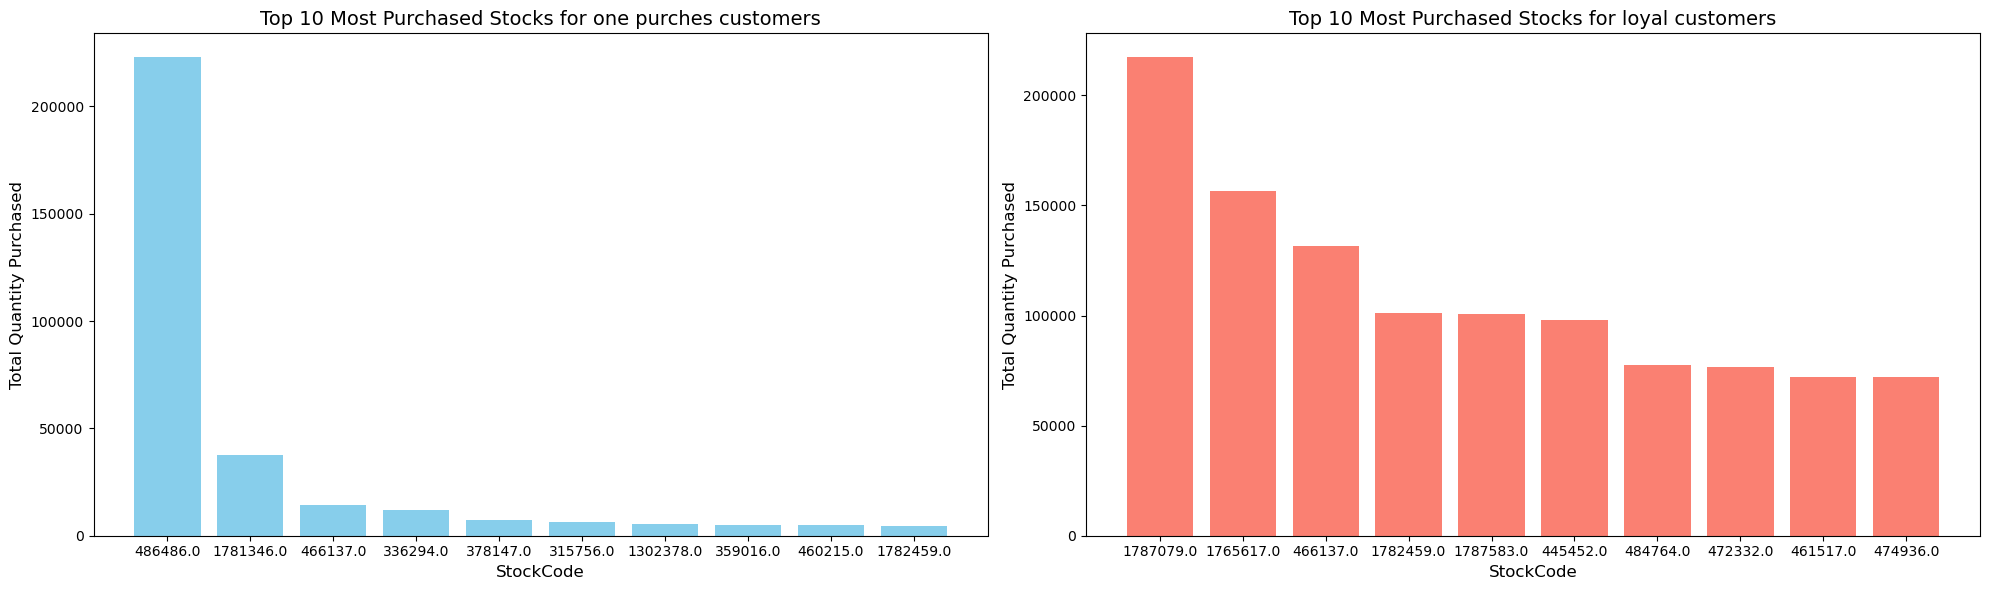

In [23]:
top10['StockCode'] = top10['StockCode'].astype(str)
top10_2['StockCode'] = top10_2['StockCode'].astype(str)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].bar(top10['StockCode'], top10['Quantity'], color='skyblue')
axes[0].set_title('Top 10 Most Purchased Stocks for one purches customers', fontsize=14)
axes[0].set_xlabel('StockCode', fontsize=12)
axes[0].set_ylabel('Total Quantity Purchased', fontsize=12)
axes[1].bar(top10_2['StockCode'], top10_2['Quantity'], color='salmon')
axes[1].set_title('Top 10 Most Purchased Stocks for loyal customers', fontsize=14)
axes[1].set_xlabel('StockCode', fontsize=12)
axes[1].set_ylabel('Total Quantity Purchased', fontsize=12)

plt.tight_layout()
plt.show()

<a id="InvoiceNo_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.4 |</span><span style='color:#ff6200'> Treating Cancelled Transactions</span></b>


In [24]:
df['Transaction_Status'] = df['Quantity'] < 0
df['Transaction_Status'] = df['Transaction_Status'].astype(int)
cancelled_transactions = df[df['Transaction_Status'] == 1]
cancelled_transactions.describe().drop('CustomerID', axis=1)

,InvoiceNo,StockCode,Quantity,UnitPrice,Transaction_Status
count,8.871000e+03,8.506000e+03,8871.000000,8871.000000,8871.0
mean,6.149158e+06,6.531598e+05,-92.328373,26.089900,1.0
std,1.426151e+05,4.381926e+05,3516.947922,614.397875,0.0
min,5.900169e+06,4.200000e+01,-242985.000000,0.020000,1.0
25%,6.022484e+06,4.655332e+05,-18.000000,2.010000,1.0
50%,6.156370e+06,4.771200e+05,-6.000000,4.080000,1.0
75%,6.269945e+06,4.873890e+05,-3.000000,6.840000,1.0
max,6.397259e+06,1.894431e+06,-3.000000,53778.600000,1.0


In [25]:
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


In [26]:
numberofcanceled = df[df['Transaction_Status'] == 1].shape[0]
numberofcanceled
percof_canceled = ( numberofcanceled / df.shape[0] ) * 100
percof_uncanceled = ( (df.shape[0] - numberofcanceled) / df.shape[0]) * 100
percof_uncanceled
print(f"perc of filled Transactions: {percof_uncanceled}%")

perc of filled Transactions: 97.79091513538147%


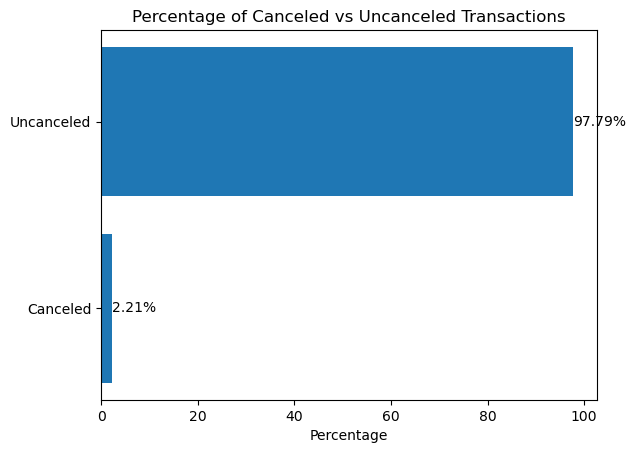

In [27]:
categories = ['Canceled', 'Uncanceled']
values = [percof_canceled, percof_uncanceled ]
plt.barh(categories, values , )

plt.xlabel('Percentage')
plt.title('Percentage of Canceled vs Uncanceled Transactions')

for index, value in enumerate(values):
    plt.text(value, index, f'{value:.2f}%', va='center')
plt.show()


In [28]:
canceled_products = df[df['Transaction_Status'] == 1]
most_canceled_products = canceled_products['StockCode'].value_counts()
most_canceled_products = (most_canceled_products / canceled_products.shape[0] ) * 100

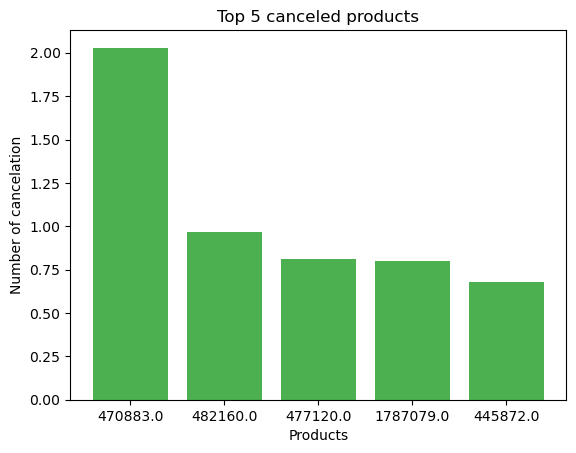

In [29]:
top_5_index = most_canceled_products.head().index.astype(str)
top_5_values = most_canceled_products.head().values
plt.bar(top_5_index , top_5_values , color='#4CAF50' )
plt.xlabel('Products')
plt.ylabel('Number of cancelation')
plt.title('Top 5 canceled products')
plt.show()

In [30]:
saled_products = df[df['Transaction_Status'] == 0]
saled_products = saled_products.groupby('StockCode')['Quantity'].sum()
saled_products = saled_products.sort_values(ascending=False)

In [31]:
saled_products_df = pd.DataFrame({'StockCode' : saled_products.index , 'Quantity' : saled_products.values})
saled_products_df['Prop'] = ( saled_products_df['Quantity'] / saled_products_df['Quantity'].sum()  ) * 100

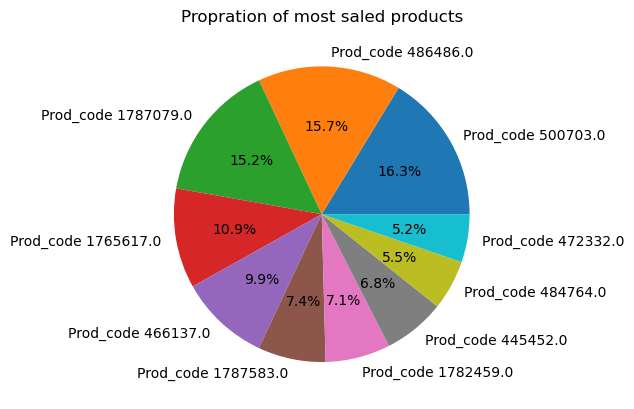

In [32]:
plt.pie(saled_products_df['Prop'].head(10), labels=("Prod_code " + saled_products_df['StockCode'].head(10).astype(str)) , autopct='%1.1f%%')
plt.title('Propration of most saled products')
plt.show()

<a id="StockCode_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.5 |</span><span style='color:#ff6200'> Correcting StockCode Anomalies</span></b>

In [33]:
df['InvoiceNo'] = df['InvoiceNo'].astype('object')
df['StockCode'] = df['StockCode'].astype('object')

In [34]:

unique_stock_codes = df['StockCode'].nunique()
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3209


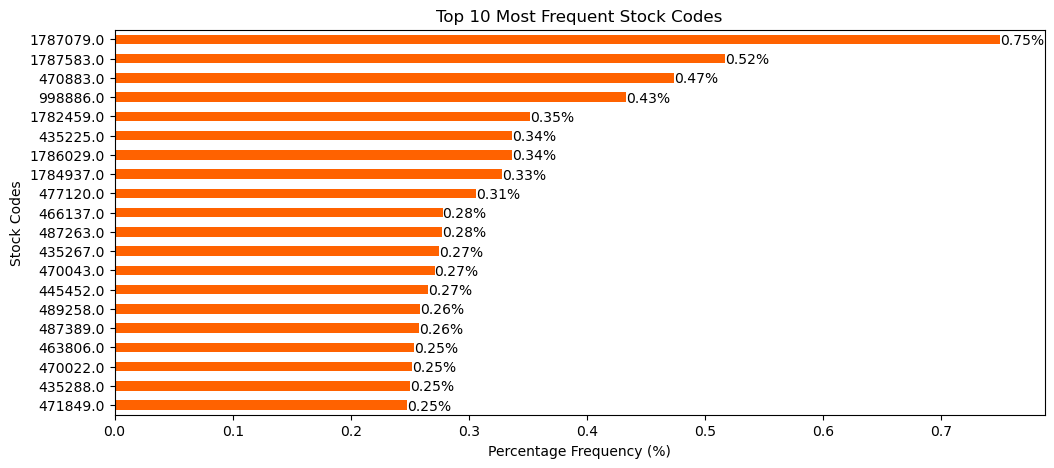

In [35]:
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(20) * 100

plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

In [36]:
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
7    2530
8     678
0       1
3       1
Name: count, dtype: int64


In [37]:
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 3)]

print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
nan
42.0


In [38]:
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [39]:
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [40]:
df.shape[0]

399654

<a id="Description_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.6|</span><span style='color:#ff6200'> Cleaning Description Column</span></b>


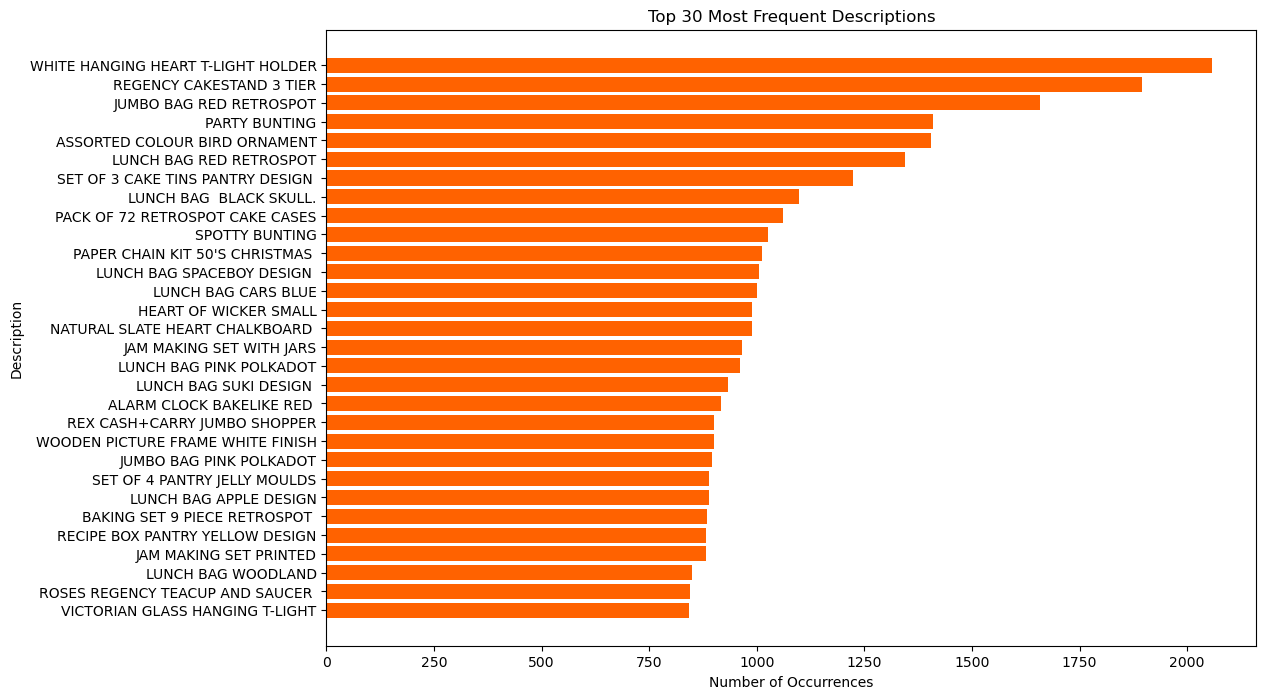

In [41]:
description_counts = df['Description'].value_counts()

top_30_descriptions = description_counts[:30]

plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

plt.show()

In [42]:
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
3 TRADITIONAl BISCUIT CUTTERS  SET
FLOWERS HANDBAG blue and orange
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FOLK ART GREETING CARD,pack/12
THE KING GIFT BAG 25x24x12cm
FRENCH BLUE METAL DOOR SIGN No
Next Day Carriage
BAG 500g SWIRLY MARBLES
NUMBER TILE COTTAGE GARDEN No
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 65CMx65CM
High Resolution Image
POLYESTER FILLER PAD 60x40cm


In [43]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

df = df[~df['Description'].isin(service_related_descriptions)]

df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [44]:
df.shape[0]

399571

<a id="UnitPrice_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.7 |</span><span style='color:#ff6200'> Treating Zero Unit Prices</span></b>


In [45]:
df['UnitPrice'].describe()

count    3.995710e+05
mean     8.259751e+00
std      2.683503e+03
min      0.000000e+00
25%      1.730000e+00
50%      2.700000e+00
75%      5.180000e+00
max      1.696285e+06
Name: UnitPrice, dtype: float64

In [46]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,1261.545455
std,6530.140825
min,3.000000
25%,6.000000
50%,33.000000
75%,108.000000
max,37620.000000


In [47]:
df = df[df['UnitPrice'] > 0]

<a id="outlier_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.8 |</span><span style='color:#ff6200'> Outlier Treatment</span></b>


In [48]:
df.reset_index(drop=True, inplace=True)

In [49]:
df.shape[0]

399538

In [50]:
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Transaction_Status
0,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1528779.0,PINK PILLAR CANDLE SILVER FLOCK,3,4.08,United Kingdom,0
1,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom,0
2,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1528779.0,IVORY PILLAR CANDLE GOLD FLOCK,3,4.08,United Kingdom,0
3,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,1732164.0,WOOD BLACK BOARD ANT WHITE FINISH,6,8.91,United Kingdom,0
4,362103.0,5960185,Fri Apr 06 06:15:00 IST 2018,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
399533,372750.0,6162508,Wed Sep 26 13:29:00 IST 2018,483105.0,TRAVEL CARD WALLET I LOVE LONDON,216,0.58,United Kingdom,0
399534,372750.0,6162508,Wed Sep 26 13:29:00 IST 2018,444759.0,NO JUNK MAIL METAL SIGN,72,0.54,United Kingdom,0
399535,372750.0,6162508,Wed Sep 26 13:29:00 IST 2018,464415.0,METAL SIGN EMPIRE TEA,36,1.10,United Kingdom,0
399536,372750.0,6162508,Wed Sep 26 13:29:00 IST 2018,358764.0,LOVE POTION MASALA INCENSE,75,0.29,United Kingdom,0


# 

<a id="Filter-year"></a>
# <b><span style='color:#fcc36d'>Step 3.9 |</span><span style='color:#ff6200'> Filter year > 2019</span></b>

In [51]:
df['InvoiceDate'].max()

'Wed Sep 26 13:29:00 IST 2018'

In [52]:
df['InvoiceDate'].min()

'Fri Apr 06 06:15:00 IST 2018'

In [53]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_year = df['InvoiceDate'].dt.year.max()
max_year
df = df[df['InvoiceDate'].dt.year != max_year]
df['InvoiceDate'].dt.year.max()

2019

<a id="question-2"></a>
# <b><span style='color:#fcc36d'>Step 3.10 |</span><span style='color:#ff6200'> Monthly Summray</span></b>


In [54]:

df_sample = df.copy()
df_sample2=df.copy()
df_sample['InvoiceDate'] = pd.to_datetime(df_sample['InvoiceDate'])

df_sample['Year'] = df_sample['InvoiceDate'].dt.year
df_sample['Month'] = df_sample['InvoiceDate'].dt.month

monthly_summary = df_sample.groupby(['Year', 'Month']).agg({'Quantity': 'sum', 'UnitPrice': 'sum'})

print("Monthly Summary - Number of Items Purchased and Total Prices:")
print(monthly_summary)


Monthly Summary - Number of Items Purchased and Total Prices:
            Quantity   UnitPrice
Year Month                      
2018 2        726264  1794359.86
     3        559545    58251.72
     4        790959    93203.80
     5        906267   104781.69
     6       1022895   116143.70
     7       1030812   111020.45
     8       1042935   118034.04
     9        982275   102377.12
     10      1298127   107737.03
     11      1147134   115500.08
     12      1823526   195904.13
2019 1       1928412   221038.62
     2       1304184   156919.83


In [55]:
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Transaction_Status
0,362103.0,5960185,2018-04-06 06:15:00,1528779.0,PINK PILLAR CANDLE SILVER FLOCK,3,4.08,United Kingdom,0
1,362103.0,5960185,2018-04-06 06:15:00,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom,0
2,362103.0,5960185,2018-04-06 06:15:00,1528779.0,IVORY PILLAR CANDLE GOLD FLOCK,3,4.08,United Kingdom,0
3,362103.0,5960185,2018-04-06 06:15:00,1732164.0,WOOD BLACK BOARD ANT WHITE FINISH,6,8.91,United Kingdom,0
4,362103.0,5960185,2018-04-06 06:15:00,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
399533,372750.0,6162508,2018-09-26 13:29:00,483105.0,TRAVEL CARD WALLET I LOVE LONDON,216,0.58,United Kingdom,0
399534,372750.0,6162508,2018-09-26 13:29:00,444759.0,NO JUNK MAIL METAL SIGN,72,0.54,United Kingdom,0
399535,372750.0,6162508,2018-09-26 13:29:00,464415.0,METAL SIGN EMPIRE TEA,36,1.10,United Kingdom,0
399536,372750.0,6162508,2018-09-26 13:29:00,358764.0,LOVE POTION MASALA INCENSE,75,0.29,United Kingdom,0


<a id="question-3"></a>
# <b><span style='color:#fcc36d'>Step 3.11 |</span><span style='color:#ff6200'> Number of purchased for each user in 30 Day</span></b>


In [56]:
df_sample2['InvoiceDate'] = pd.to_datetime(df_sample2['InvoiceDate'])

df_sample2.set_index('InvoiceDate', inplace=True)

df_sample2.sort_index(inplace=True)

result = df_sample2.groupby('CustomerID').rolling('30D')['Quantity'].sum().reset_index()

print(result)


        CustomerID         InvoiceDate  Quantity
0         259266.0 2018-04-01 06:01:00  222645.0
1         259266.0 2018-04-01 06:17:00       0.0
2         259287.0 2018-04-09 10:30:00      12.0
3         259287.0 2018-04-09 10:30:00      24.0
4         259287.0 2018-04-09 10:30:00      36.0
...            ...                 ...       ...
398420    384027.0 2018-12-24 06:23:00    2826.0
398421    384027.0 2018-12-24 06:23:00    2970.0
398422    384027.0 2019-01-09 05:29:00    3042.0
398423    384027.0 2019-01-09 05:29:00    3150.0
398424    384027.0 2019-01-09 05:29:00    3294.0

[398425 rows x 3 columns]


<a id="feature_engineering"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Extracting New Feature </p>

<a id="recency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.1 |</span><span style='color:#ff6200'> Days Since Last Purchase for each customer</span></b>

In [57]:

df['InvoiceDay'] = df['InvoiceDate'].dt.date

customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()
most_recent_date = df['InvoiceDay'].max()

customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [58]:
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Country,Transaction_Status,InvoiceDay
0,362103.0,5960185,2018-04-06 06:15:00,1528779.0,PINK PILLAR CANDLE SILVER FLOCK,3,4.08,United Kingdom,0,2018-04-06
1,362103.0,5960185,2018-04-06 06:15:00,478086.0,PHOTO FRAME CORNICE,12,4.08,United Kingdom,0,2018-04-06
2,362103.0,5960185,2018-04-06 06:15:00,1528779.0,IVORY PILLAR CANDLE GOLD FLOCK,3,4.08,United Kingdom,0,2018-04-06
3,362103.0,5960185,2018-04-06 06:15:00,1732164.0,WOOD BLACK BOARD ANT WHITE FINISH,6,8.91,United Kingdom,0,2018-04-06
4,362103.0,5960185,2018-04-06 06:15:00,451185.0,RETROSPOT HEART HOT WATER BOTTLE,30,6.84,United Kingdom,0,2018-04-06
...,...,...,...,...,...,...,...,...,...,...
399533,372750.0,6162508,2018-09-26 13:29:00,483105.0,TRAVEL CARD WALLET I LOVE LONDON,216,0.58,United Kingdom,0,2018-09-26
399534,372750.0,6162508,2018-09-26 13:29:00,444759.0,NO JUNK MAIL METAL SIGN,72,0.54,United Kingdom,0,2018-09-26
399535,372750.0,6162508,2018-09-26 13:29:00,464415.0,METAL SIGN EMPIRE TEA,36,1.10,United Kingdom,0,2018-09-26
399536,372750.0,6162508,2018-09-26 13:29:00,358764.0,LOVE POTION MASALA INCENSE,75,0.29,United Kingdom,0,2018-09-26


In [59]:
df['InvoiceDay'].max()

datetime.date(2019, 2, 20)

In [60]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,259266.0,325
1,259287.0,2
2,259308.0,75
3,259329.0,18
4,259350.0,310


<a id="frequency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.2 |</span><span style='color:#ff6200'> Total Purchase and Total Transactions</span></b>


In [61]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,259266.0,325,2,0
1,259287.0,2,6,6417
2,259308.0,75,4,6996
3,259329.0,18,1,1890
4,259350.0,310,1,588


<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 4.1.3 |</span><span style='color:#ff6200'>Total spend and Avrage_Transiction_Value</span></b>


In [62]:
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,259266.0,325,2,0,0.00,0.00
1,259287.0,2,6,6417,14928.18,2488.03
2,259308.0,75,4,6996,5991.12,1497.78
3,259329.0,18,1,1890,6043.92,6043.92
4,259350.0,310,1,588,1221.60,1221.60


<a id="product_diversity"></a>
# <b><span style='color:#fcc36d'>Step 4.2 |</span><span style='color:#ff6200'> Number of unique products purchased by each customer</span></b>


In [63]:
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,259266.0,325,2,0,0.00,0.00,1
1,259287.0,2,6,6417,14928.18,2488.03,85
2,259308.0,75,4,6996,5991.12,1497.78,21
3,259329.0,18,1,1890,6043.92,6043.92,71
4,259350.0,310,1,588,1221.60,1221.60,16


<a id="behaviroal_features"></a>
# <b><span style='color:#fcc36d'>Step 4.3 |</span><span style='color:#ff6200'>Average days between Purches & favroite Day and Hour</span></b>

In [64]:
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.sort_values().diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,259266.0,325,2,0,0.00,0.00,1,0.000000,6,6
1,259287.0,2,6,6417,14928.18,2488.03,85,2.100000,5,8
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15
3,259329.0,18,1,1890,6043.92,6043.92,71,0.000000,5,5
4,259350.0,310,1,588,1221.60,1221.60,16,0.000000,0,12


<a id="geographical_features"></a>
# <b><span style='color:#fcc36d'>Step 4.4 |</span><span style='color:#ff6200'> Geographic Features</span></b>


In [65]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890928
Germany           0.022747
France            0.020312
EIRE              0.018493
Spain             0.006179
Name: proportion, dtype: float64

In [66]:
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,259266.0,325,2,0,0.00,0.00,1,0.000000,6,6,1
1,259287.0,2,6,6417,14928.18,2488.03,85,2.100000,5,8,0
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15,0
3,259329.0,18,1,1890,6043.92,6043.92,71,0.000000,5,5,0
4,259350.0,310,1,588,1221.60,1221.60,16,0.000000,0,12,0


In [67]:
customer_data['Is_UK'].value_counts()

Is_UK
1    3860
0     416
Name: count, dtype: int64

<a id="cancellation_insights"></a>
# <b><span style='color:#fcc36d'>Step 4.5 |</span><span style='color:#ff6200'> Cancellation Insights</span></b>


In [68]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

cancelled_transactions = df[df['Transaction_Status'] == 1]
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,259266.0,325,2,0,0.00,0.00,1,0.000000,6,6,1,1.0,0.5
1,259287.0,2,6,6417,14928.18,2488.03,85,2.100000,5,8,0,0.0,0.0
2,259308.0,75,4,6996,5991.12,1497.78,21,10.884615,1,15,0,0.0,0.0
3,259329.0,18,1,1890,6043.92,6043.92,71,0.000000,5,5,0,0.0,0.0
4,259350.0,310,1,588,1221.60,1221.60,16,0.000000,0,12,0,0.0,0.0


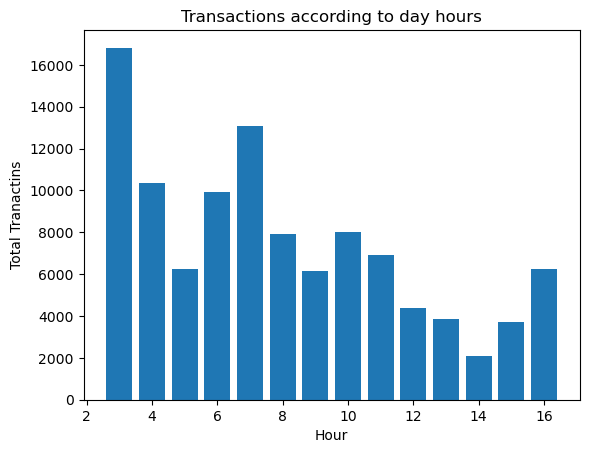

In [69]:
mean_tran = customer_data.groupby('Hour')['Total_Spend'].mean()
plt.bar(mean_tran.index , mean_tran.values , color='#1f77b4')
plt.title('Transactions according to day hours')
plt.xlabel('Hour')
plt.ylabel('Total Tranactins')
plt.show()

Text(0.5, 1.0, 'mean transactions per Day')

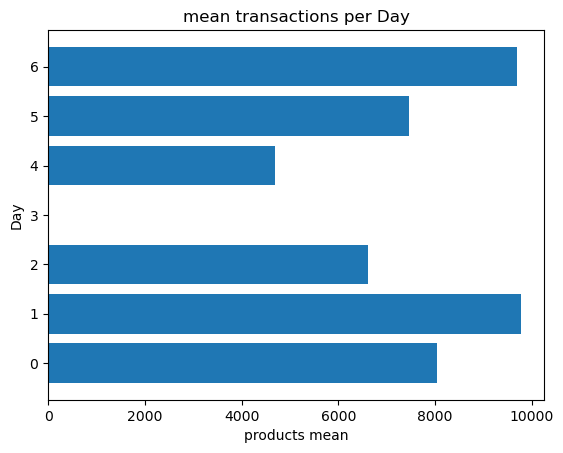

In [70]:
mean_prod = customer_data.groupby('Day_Of_Week')['Total_Spend'].mean()
plt.barh(mean_prod.index , mean_prod.values)
plt.xlabel('products mean')
plt.ylabel('Day')
plt.title('mean transactions per Day')

Cluster Centers:
[[-6.39672566e-03 -1.58176427e-03]
 [-3.09948400e+02 -2.27388786e-03]
 [-1.67082998e-02  6.31206715e+02]
 [ 3.09851091e+02 -2.27388786e-03]
 [ 2.13006159e+00 -2.41252723e-03]]


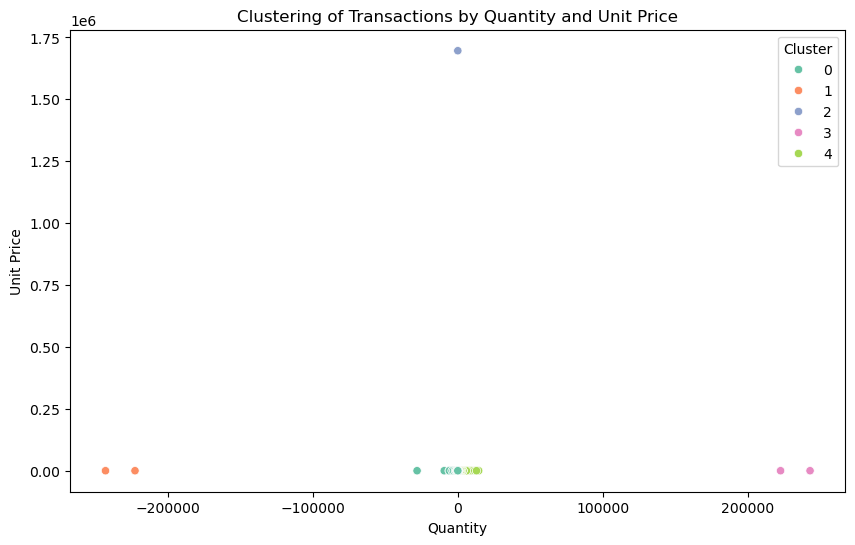

In [71]:
from sklearn.cluster import KMeans

# Select relevant features for clustering (example: 'Quantity' and 'UnitPrice')
X = df[['Quantity', 'UnitPrice']]

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster centers
print(f"Cluster Centers:\n{kmeans.cluster_centers_}")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', hue='Cluster', data=df, palette='Set2')
plt.title('Clustering of Transactions by Quantity and Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend(title='Cluster')
plt.show()
